In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("breast-cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
from sklearn.datasets import make_classification

In [4]:
x, y = make_classification(n_samples=300, n_features=2, n_redundant=0,n_informative=2, n_clusters_per_class=1, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [9]:
x_train.shape, x_test.shape

((210, 2), (90, 2))

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_boundary(clf, x, y, title):
    h = .02  
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, alpha=0.3)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.BrBG)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [13]:
from sklearn.svm import SVC

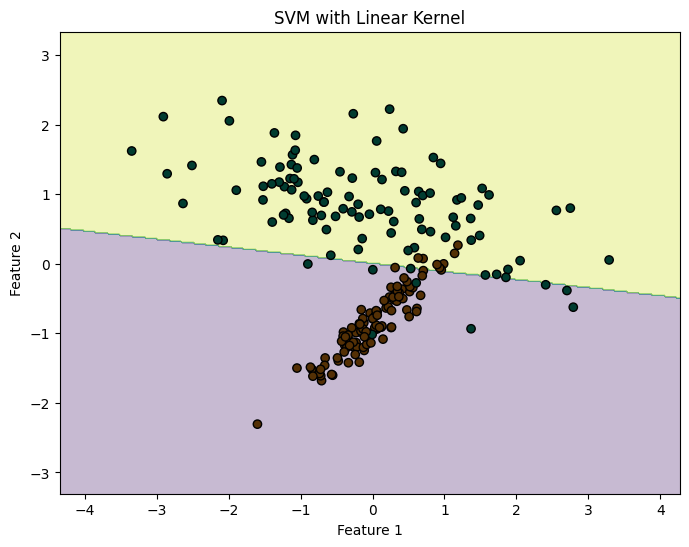

In [14]:
svm = SVC(kernel='linear', C=1)
svm.fit(x_train, y_train)
plot_boundary(svm, x_train, y_train, 'SVM with Linear Kernel')

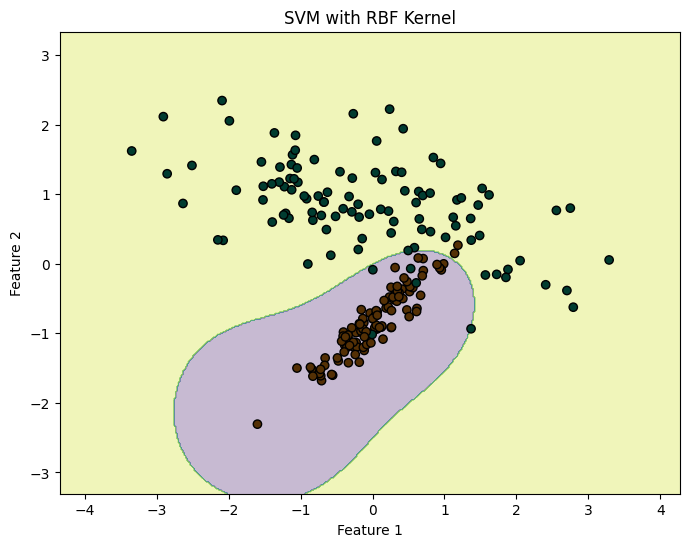

In [15]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(x_train, y_train)
plot_boundary(svm_rbf, x_train, y_train, 'SVM with RBF Kernel')

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best Parameters from GridSearchCV:", grid.best_params_)
best_model = grid.best_estimator_

Best Parameters from GridSearchCV: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.metrics import *

In [20]:
cv_scores = cross_val_score(best_model, x_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores,"\n")
print("Mean CV Accuracy:", np.mean(cv_scores))

y_pred = best_model.predict(x_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred),"\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),"\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.93333333 1.         0.95       0.98333333 0.98333333] 

Mean CV Accuracy: 0.97

Test Accuracy: 0.9555555555555556 

Confusion Matrix:
 [[45  1]
 [ 3 41]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.98      0.93      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90

